In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [4]:
data.sample(15)

,User ID,Gender,Age,EstimatedSalary,Purchased
88,15768816,Male,26,81000,0
374,15793890,Female,37,80000,0
133,15638963,Female,21,68000,0
59,15789109,Female,32,117000,0
342,15717560,Female,38,65000,0
63,15583681,Male,32,120000,1
335,15601550,Female,36,54000,0
219,15732987,Male,59,143000,1
284,15638646,Male,48,141000,0
71,15726358,Female,24,27000,0


In [5]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
data['Gender'].replace(('Male', 'Female'), (1,0), inplace=True)
data['Gender'].astype('int')

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int32

<Axes: >

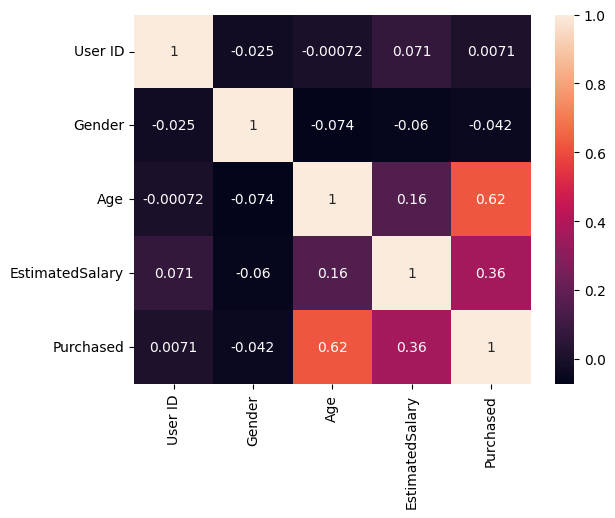

In [7]:
sns.heatmap( data.corr(), annot=True )

<Axes: xlabel='Age', ylabel='Purchased'>

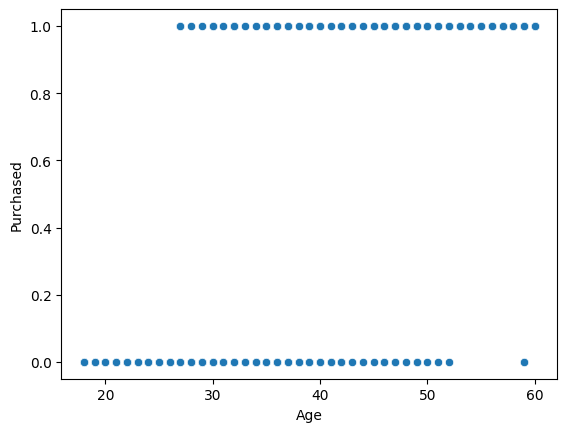

In [25]:
sns.scatterplot(data=data, x='Age', y='Purchased')

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [84]:
X = data['Age'].values.reshape(-1,1)
Y = data['Purchased']

In [85]:
model = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [86]:
model.fit(X_train, Y_train)

LogisticRegression()

In [87]:
prediction = model.predict(X_test)
print(prediction)

[1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1
 0 0 1 1 0 1]


In [88]:
score = model.score(X_test, Y_test)
print(score)

0.7625


In [89]:
meanSqr2 = mean_squared_error(Y_test,prediction)
print(meanSqr2)

0.2375


<Axes: >

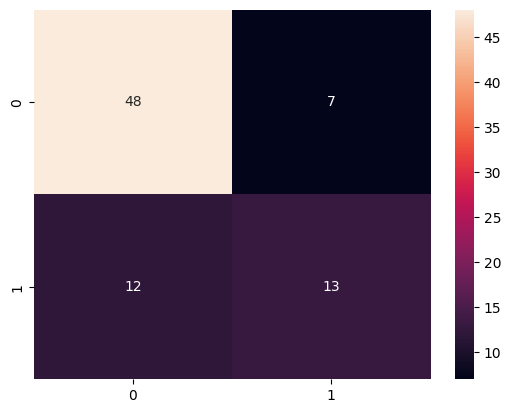

In [90]:
conMat = confusion_matrix(Y_test, prediction)
sns.heatmap(conMat, annot=True)

In [91]:
print('Accuracy :', accuracy_score(Y_test, prediction))
print('Precision :', precision_score(Y_test, prediction))
print('Recall Score :', recall_score(Y_test, prediction))
print('F1 Score :', f1_score(Y_test, prediction))

Accuracy : 0.7625
Precision : 0.65
Recall Score : 0.52
F1 Score : 0.5777777777777777


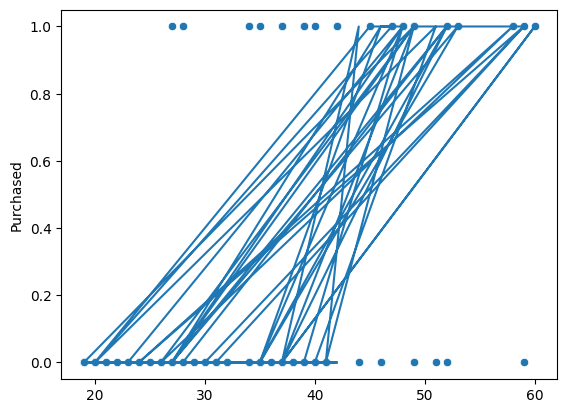

In [92]:
sns.scatterplot(x=X_test.squeeze(), y=Y_test, color='Red')
sns.lineplot(x=X_test.squeeze(), y=prediction, color='Black')